<a href="https://colab.research.google.com/github/ibbu-riz/Data-Science/blob/main/K_Means_Clustering_Flipkart_Data_Set%20(Age%20and%20Number%20of%20products%20purchased).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering (Age and Number of products purchased

## Importing libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [51]:
dataset = pd.read_csv('Flipkart data set.csv')
X = dataset.iloc[:, [0, 2]].values

In [52]:
print(X)

[[ 52  30]
 [ 77   1]
 [ 82   1]
 [ 54  16]
 [ 36  64]
 [ 61  63]
 [ 28  83]
 [ 21  53]
 [ 97  79]
 [ 77  58]
 [ 21 100]
 [ 33  18]
 [ 60   4]
 [ 64  54]
 [ 20   7]
 [  7  19]
 [ 21  30]
 [ 63  40]
 [ 17  72]
 [ 48  58]
 [ 46  11]
 [  5  52]
 [ 48  85]
 [ 85  74]
 [ 26  73]
 [ 37  27]
 [ 73  33]
 [ 20  79]
 [ 82  45]
 [ 75  67]]


## Optimal number of clusters via Elbow Method

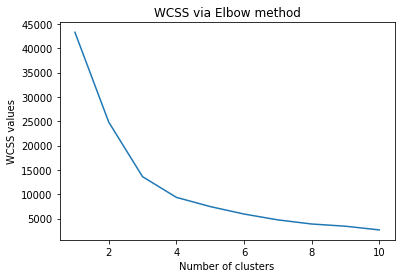

In [53]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("WCSS via Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")
plt.show()

## K Means Model Training on Training set

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [55]:
print(y_means)

[3 3 3 3 2 0 2 2 0 0 2 1 3 0 1 1 1 3 2 2 1 2 2 0 2 1 3 2 0 0]


## Visualizing Clusters

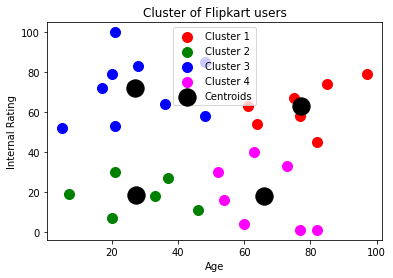

In [56]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Cluster of Flipkart users')
plt.xlabel('Age')
plt.ylabel('Internal Rating')
plt.legend()
plt.show()